<a href="https://colab.research.google.com/github/carloscesar182/ai_advanced_course/blob/main/Notebooks/RNA/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [ ]:
# importar o conjunto de dados mnist
# nesse exercício não vamos importar a classe (y) porque não será supervisionado
# nosso intúito será treinar o modelo pra detectar o número escrito a mão
# para isso, não passaremos o y, como de costume pra pegar a carga
(X_train, _), (X_test, _) = mnist.load_data()

In [ ]:
X_train.shape

In [ ]:
# ver só os pixels da linha 4
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,
        148, 210, 253, 253, 113,  87, 148,  55,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 232,
        252, 253, 189, 210, 252, 252, 253, 168,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  57, 242, 252,
        190,  65,   5,  12, 182, 252, 253, 116,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 183,
         14,   0,   0,  92, 252, 252, 225,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 253, 252, 146,  14,
          0,   0,   0, 215, 252, 252,  79,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 247, 176,   9,   0,
          0,   8,  78, 245, 253, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 232, 252, 176,   0,   0,   0,
         36, 201, 252, 252, 169,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  22, 252, 252,  30,  22, 119, 197,
        241, 253, 252, 251,  77,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 231, 252, 253, 252, 252, 252,
        226, 227, 252, 231,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55, 235, 253, 217, 138,  42,
         24, 192, 252, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62, 255, 253, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        106, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 255, 253,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 218, 252,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

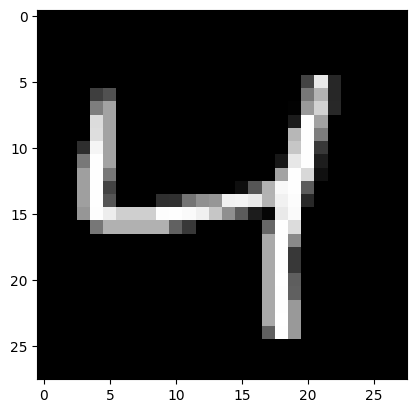

In [ ]:
# ver a imagem
plt.imshow(X_train[2], cmap='gray')
plt.show()

In [ ]:
# normalizar os dados numa escala de 0 e 1
# pq temos problemas no autoencoder por ser uma matriz 8 bits ser de 0 a 255
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# fazer o reshape para remodelar a matriz para o formato de 1 dimensão
# isso é necessário pq uma rna espera os dados em 1d
# o primeiro parametro do reshape é o número de dimensões
# o segundo parametro é uma tupla que seleciona todas as dimensões, exceto a primeira
# o resultado é passado pra função do numpy (np.prod), que calcula todos os objetos na tupla e resulta numa dimensão única
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [ ]:
# criar conjunto de dados com ruído usando o np.random.normal
# numa distribuição normal eu obrigatóriamente preciso definir média, desvio padrão (uso o loc) e tamanho
# em resumo, geraremos dados de uma distribuição normal, multiplicaremos por 0.5 e somamos pixel a pixel com a matriz da variavel X_train
# é uma tecnica comum de adição de ruído em processamento de imagens
X_train_noisy = X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [ ]:
# como o ruído adicionado pode extrapolar o limite entre 0 e 1, teremos que fazer um tratamento adicional para garantir que fique no range
# para isso vamos usar o numpy clip travando o limite entre 0.0 e 1.0
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

In [ ]:
from json import decoder
# criar a camada de entrada com o input
# o tamanho é 784 pq multiplicamos 28x28 dos pixels da matriz
# a vírgula é pro python entender que é uma tupla
inputs = Input(shape=(784,))

# criar o encoder e o decoder com camadas densas
encoder = Dense(32, activation='relu')(inputs)
decoder = Dense(784, activation='sigmoid')(encoder)

# criar o modelo
autoencoder = Model(inputs, decoder)

# compilar o modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# treinar o modelo
# parametro shuffle embaralha os dados pra não entrarem em ordem pra rna não aprender um padrão na ordem
# validation_data garante que os dados da validação são utilizados para o calculo de loss e ele não usar os dados de treino
autoencoder.fit(X_train_noisy, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test_noisy, X_test))

In [ ]:
# pegar um índice de uma imagem aleatória
idx = np.random.randint(X_test.shape[0])

# separar a imagem
original_image = X_test[idx]

# adicionar ruído
noisy_image = original_image + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=original_image.shape)

# remover os dados que estão fora da normalização
noisy_image = np.clip(noisy_image, 0.0, 1.0)

# remover o ruído
denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0))

# trazer a imagem de volta pra 28x28
denoised_image = denoised_image.reshape((28, 28))

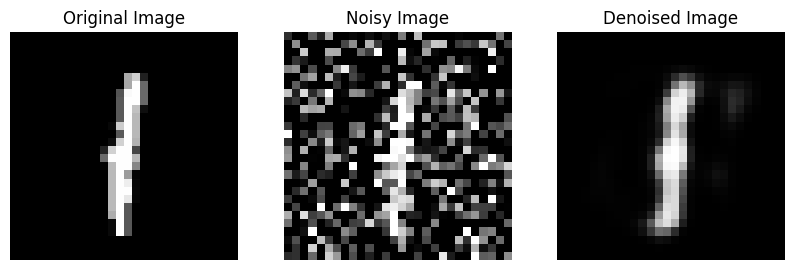

In [ ]:
# mostrar as 3 imagens
plt.figure(figsize=(10, 4))

# imprimir 3 subplots
# imagem 1
plt.subplot(131)
plt.imshow(original_image.reshape((28, 28)), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# imagem 2
plt.subplot(132)
plt.imshow(noisy_image.reshape((28, 28)), cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# imagem 3
plt.subplot(133)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()